In [1]:
using LinearAlgebra, Test, Plots, Random, Distributions, Printf
pyplot()

nothing;

In [2]:
function strong_kron(A,B ::Array{T,N}) where {T<:Number,N}
    @assert size(A,3) == size(B,1)
    α=size(A,1)
    μ=size(A,2)
    β=size(A,3)
    ρ=size(B,2)
    γ=size(B,3)
    
    A = reshape(A,α*μ,β)
    B = reshape(B,β,ρ*γ)
    
    C = A*B
    
    C=reshape(C,α,μ*ρ,γ)
    
    return C
end
nothing;

In [3]:
function evaluate(S,n)
    N = length(S)
    A = copy(S[1])
    for j ∈ 2:N
        A=strong_kron(A,copy(S[j]))
    end
    A = reshape(A,n...)
    return A
end

evaluate (generic function with 1 method)

In [4]:
function TT_SVD(A, reqrank)
    
    N = ndims(A)
    S = copy(A)
    n = collect(size(A))
    Uk = []
   
    prev_dim = 1
    d = length(reqrank)
    
    ε = Vector{Float64}(undef, d-1)
    σ = Vector{Vector{Float64}}(undef, d-1)
    for k ∈ 1:d-1
       
        q = prod(n[k+1:N])
        B = reshape(S,prev_dim*n[k],q)
        
        Bk_svd = svd(B; full=false)
        
        U1 = Bk_svd.U[ :, 1:reqrank[k] ]                      #generating approximation
        V1t = Bk_svd.Vt[1:reqrank[k],: ]
        Sigma1 = Diagonal(Bk_svd.S[1:reqrank[k]])
        
        σ[k] = Bk_svd.S
        ρ = min(reqrank[k], length(σ[k]))
        ε[k] = norm(σ[k][ρ+1:end])
        
        U1 = reshape(U1,prev_dim,n[k],reqrank[k])
        S = Sigma1*V1t
        S = reshape(S,reqrank[k],q)
        
        push!(Uk,U1)
        prev_dim = reqrank[k]
    end
    U1 = reshape(S,prev_dim,n[d],1)
    push!(Uk,U1)
    return Uk, ε,σ
end

TT_SVD (generic function with 1 method)

In [5]:
T = Float64
d=4
n = [20+i for i in 1:d]
r = [2*i for i in 1:d-1]

push!(r,1)
prev_dim = 1 
U_col = []
for i ∈ 1:d
    U = rand(Uniform(-1,1),prev_dim,n[i],r[i])
    push!(U_col,U)
    prev_dim = r[i]
end

In [6]:
println(n)
C = evaluate(U_col,n)

[21, 22, 23, 24]


21×22×23×24 Array{Float64, 4}:
[:, :, 1, 1] =
  0.0332281   -0.269667     0.163749    …   0.867428   -0.0471643   0.125087
  0.228957    -0.430149     0.384705        2.0792      0.384081    0.60053
  0.682924     0.936105    -0.00810003      0.144464    2.24753     1.38504
 -0.59079     -0.83203      0.0185759      -0.0643335  -1.95535    -1.19412
  0.477717     0.461453     0.0950272       0.628867    1.47617     1.00425
 -0.0905185    0.38305     -0.263005    …  -1.40339    -0.0460863  -0.276406
 -0.552346    -0.854294     0.0571544       0.148409   -1.86605    -1.10243
 -0.647287    -0.777802    -0.0493192      -0.435688   -2.0759     -1.3328
  0.40612      1.00897     -0.240338       -1.14864     1.56114     0.740867
  0.51829      0.293521     0.210955        1.24764     1.4987      1.12746
 -0.0862862    0.150649    -0.139015    …  -0.752302   -0.150437   -0.224222
 -0.0873901   -0.548003     0.224023        1.15036    -0.500235   -0.0988555
  0.0336993    0.00831967   0.019322 

In [7]:
Uk, SVD_val, norm_error = TT_SVD(C, r)
C_approx = evaluate(Uk,n)

21×22×23×24 Array{Float64, 4}:
[:, :, 1, 1] =
  0.0332281   -0.269667     0.163749    …   0.867428   -0.0471643   0.125087
  0.228957    -0.430149     0.384705        2.0792      0.384081    0.60053
  0.682924     0.936105    -0.00810003      0.144464    2.24753     1.38504
 -0.59079     -0.83203      0.0185759      -0.0643335  -1.95535    -1.19412
  0.477717     0.461453     0.0950272       0.628867    1.47617     1.00425
 -0.0905185    0.38305     -0.263005    …  -1.40339    -0.0460863  -0.276406
 -0.552346    -0.854294     0.0571544       0.148409   -1.86605    -1.10243
 -0.647287    -0.777802    -0.0493192      -0.435688   -2.0759     -1.3328
  0.40612      1.00897     -0.240338       -1.14864     1.56114     0.740867
  0.51829      0.293521     0.210955        1.24764     1.4987      1.12746
 -0.0862862    0.150649    -0.139015    …  -0.752302   -0.150437   -0.224222
 -0.0873901   -0.548003     0.224023        1.15036    -0.500235   -0.0988555
  0.0336993    0.00831967   0.019322 

In [8]:
println(norm(C-C_approx,2)/norm(C,2))

2.5239340665978642e-15


Assignment 3

construct the one-dimensional grid

In [9]:
d = 4
n = 51

t = collect(0:n-1)./(n-1)
t = 2 .*t .-1

nothing;

construct  𝐴  and  𝐵 


In [10]:
A = ones(Float64, n*ones(Int, d)...)
for k ∈ 1:d
    A .+= reshape(t.^2, ones(Int, k-1)..., n, ones(Int, d-k)...)./8^(k-1)
end
A .= 1 ./A

B = zeros(Float64, n*ones(Int, d)...)
C = zeros(Float64, n*ones(Int, d)...)
for k ∈ 1:d
    B .+= reshape(t.^2, ones(Int, k-1)..., n, ones(Int, d-k)...)./8^(k-1)
    C .+= reshape(t, ones(Int, k-1)..., n, ones(Int, d-k)...)./4^(k-1)
end
B = sqrt.(B) .* (1 .+ cos.(C.*π.*4)./2)

nothing;

In [11]:
println(size(A))

(51, 51, 51, 51)


In [12]:
σA = Vector{Vector{Float64}}(undef, d)
σB = Vector{Vector{Float64}}(undef, d)
for k ∈ 1:d-1
    U = reshape(A, n^k,n^(d-k))
    F = svd(U; full=false)
    σA[k] = F.S

    U = reshape(B, n^k,n^(d-k))
    F = svd(U; full=false)
    σB[k] = F.S
end

In [13]:
function threshold(δ::Vector{T}, τ::T, ε::T, r::Int) where {T<:Real}
	if τ < 0
		throw(ArgumentError("τ is required to be nonnegative"))
	end
	if ε < 0
		throw(ArgumentError("ε is required to be nonnegative"))
	end
	if r < 0
		throw(ArgumentError("r is required to be nonnegative"))
	end
	n = length(δ)
	σ,ρ = zero(T),n
	if n > 0
		if r > 0
			ρ = min(r, ρ)
		end
		if τ > 0
			k = findlast(x -> x > τ, δ)
			if isa(k, Int)
				ρ = min(k, ρ)::Int
			else
				ρ = 0
			end
		end
		if ε > 0
			δ = cumsum(reverse(δ))
			k = findlast(x -> x ≤ ε, δ)
			if isa(k, Int)
				ρ = min(n-k, ρ)::Int
			end
			if ρ < n
				σ = δ[n-ρ]
			end
			return σ,ρ
		end
		σ = sum(δ[ρ+1:n])
	end
	σ,ρ
end

threshold (generic function with 1 method)

┌ Warning: Keyword argument letter not supported with Plots.PyPlotBackend().  Choose from: annotations, arrow, aspect_ratio, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_edges, bar_position, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_tickfontcolor, colorbar_tickfontfamily, colorbar_tickfonthalign, colorbar_tickfontrotation, colorbar_tickfontsize, colorbar_tickfontvalign, colorbar_ticks, colorbar_title, connections, contour_labels, contours, discrete_values, dpi, fill_z, fillalpha, fillcolor, fillrange, flip, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_guide, foreground_color_subplot, foreground_color_text, foreground_color_title, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guide_position, guidefontcolor, guidefontfamily, guidefontsize, html_output_format, inset_subplots, label, 

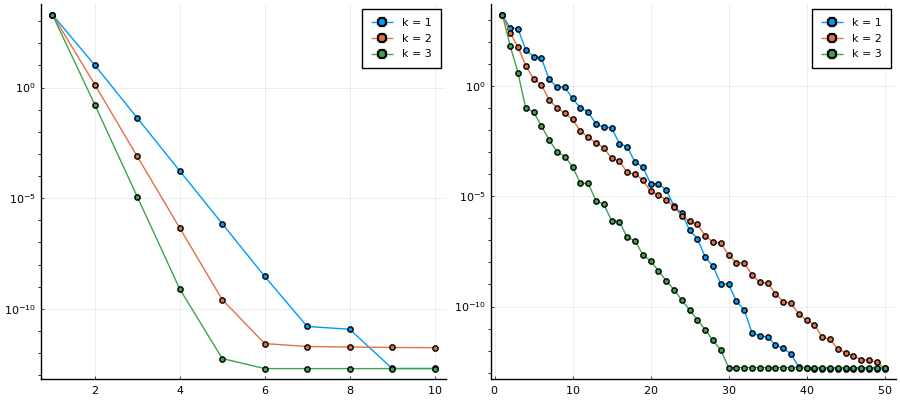

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [14]:
indA = 1:10
indB = 1:50

p = plot(; yscale=:log10, label="", layout=2, size=(900,400))

for k ∈ 1:d-1
    plot!(p[1], indA, σA[k][indA], label=@sprintf("k = %d", k), marker=:o, markersize=4)
end

pB = plot([]; yscale=:log10, label="")
for k ∈ 1:d-1
    plot!(p[2], indB, σB[k][indB], label=@sprintf("k = %d", k), marker=:o, markersize=4)
end

plot(p)

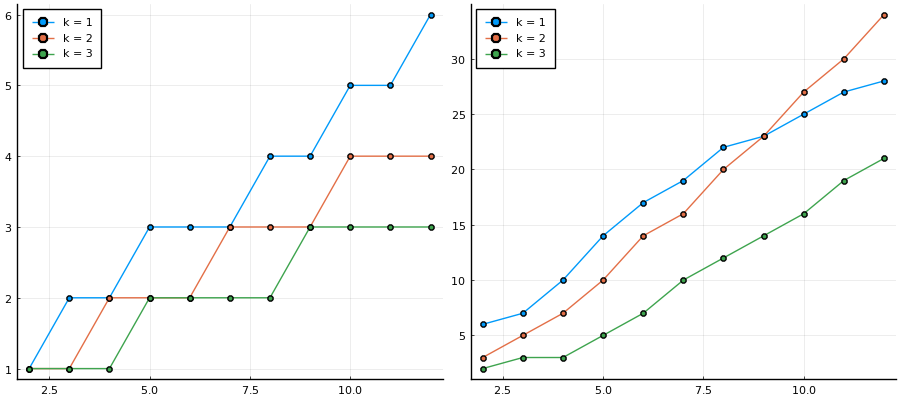

In [15]:
J = collect(2:12)
ϵ = 0.1.^J
εA = zeros(Float64, d-1, length(J))
rA = zeros(Int, d-1, length(ϵ))
εB = zeros(Float64, d-1, length(J))
rB = zeros(Int, d-1, length(J))

for k ∈ 1:d-1, j ∈ 1:length(J)
    εA[k,j],rA[k,j] = threshold((σA[k]./norm(σA[k])).^2, 0.0, ϵ[j]^2, 0)
    εA[k,j] = sqrt(εA[k,j])
    εB[k,j],rB[k,j] = threshold((σB[k]./norm(σB[k])).^2, 0.0, ϵ[j]^2, 0)
    εB[k,j] = sqrt(εB[k,j])
end

p = plot(; layout=2, size=(900,400))
plot!(p[1]; legend=:topleft)
plot!(p[2]; legend=:topleft)

for k ∈ 1:d-1
    plot!(p[1], J, rA[k,:], label=@sprintf("k = %d", k), marker=:o, markersize=4)
    plot!(p[2], J, rB[k,:], label=@sprintf("k = %d", k), marker=:o, markersize=4)
end
current()

In [16]:
last_dim = [1 for i ∈ 1:length(J)]
rA = vcat(rA,last_dim')
rB = vcat(rB,last_dim')

4×11 Matrix{Int64}:
 6  7  10  14  17  19  22  23  25  27  28
 3  5   7  10  14  16  20  23  27  30  34
 2  3   3   5   7  10  12  14  16  19  21
 1  1   1   1   1   1   1   1   1   1   1

In [17]:
δ = zeros(Float64, d-1, length(J))

@printf("tensor A:\n")
nrm = norm(A)
errA = zeros(Float64, d-1, length(J))
sA = Matrix{Vector{Float64}}(undef, d-1, length(J))
NtA = zeros(Int, length(J))
for j ∈ 1:length(J)
    Uk,δ[:,j],sA[:,j] = TT_SVD(A, rA[:,j])
    AA = evaluate(Uk, [51,51,51,51])
    errA[j] = norm(AA-A)/nrm
    NtA[j] = sum(length.(Uk))
    c_opt = errA[j]/norm(εA[:,j])
    c_orth = errA[j]/(norm(δ[:,j])/nrm)
    @printf("\tϵ = %2.0e, err = %2.2e (%.6f)\terr orth check: %.8f\n",
                                                        ϵ[j], errA[j], c_opt, c_orth)
end
@printf("tensor B:\n")
nrm = norm(B)
errB = zeros(Float64, d-1, length(J))
sB = Matrix{Vector{Float64}}(undef, d-1, length(J))
NtB = zeros(Int, length(J))
for j ∈ 1:length(J)
    UB,δ[:,j],sB[:,j] = TT_SVD(B, rB[:,j])
    BB = evaluate(UB, [51,51,51,51])
    errB[j] = norm(BB-B)/nrm
    NtB[j] = sum(length.(UB))
    c_opt = errB[j]/norm(εB[:,j])
    c_orth = errB[j]/(norm(δ[:,j])/nrm)
    @printf("\tϵ = %2.0e, err = %2.2e (%.6f)\terr orth check: %.8f\n",
                                                        ϵ[j], errB[j], c_opt, c_orth)
end

tensor A:
	ϵ = 1e-02, err = 5.14e-03 (0.991561)	err orth check: 1.00000000
	ϵ = 1e-03, err = 6.79e-04 (0.992298)	err orth check: 1.00000000
	ϵ = 1e-04, err = 8.71e-05 (0.999950)	err orth check: 1.00000000
	ϵ = 1e-05, err = 3.92e-07 (0.999810)	err orth check: 1.00000000
	ϵ = 1e-06, err = 3.92e-07 (0.999810)	err orth check: 1.00000000
	ϵ = 1e-07, err = 8.56e-08 (0.999997)	err orth check: 1.00000000
	ϵ = 1e-08, err = 5.79e-09 (0.999998)	err orth check: 1.00000001
	ϵ = 1e-09, err = 4.17e-10 (0.999962)	err orth check: 0.99999996
	ϵ = 1e-10, err = 1.51e-12 (1.000001)	err orth check: 0.99997239
	ϵ = 1e-11, err = 1.51e-12 (1.000001)	err orth check: 0.99997239
	ϵ = 1e-12, err = 4.12e-13 (1.000307)	err orth check: 0.99988981
tensor B:
	ϵ = 1e-02, err = 5.64e-03 (0.981744)	err orth check: 1.00000000
	ϵ = 1e-03, err = 9.95e-04 (0.983294)	err orth check: 1.00000000
	ϵ = 1e-04, err = 1.19e-04 (0.970410)	err orth check: 1.00000000
	ϵ = 1e-05, err = 1.29e-05 (0.974935)	err orth check: 1.00000000
	ϵ = 

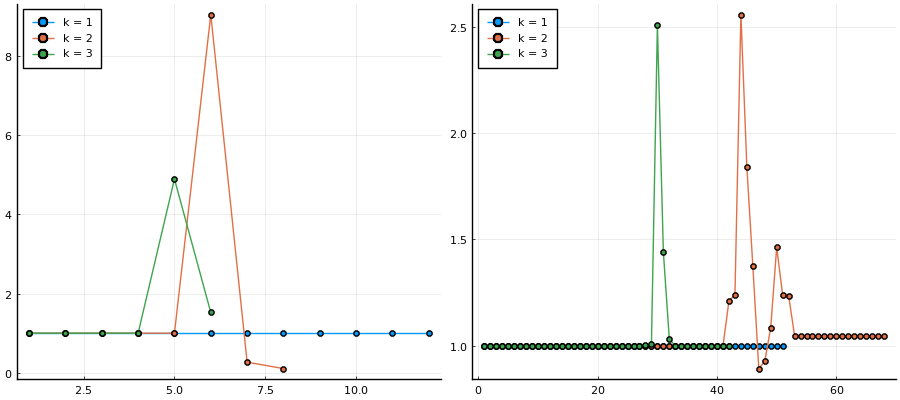

In [18]:
p = plot(; layout=2, size=(900,400))

plot!(p[1]; legend=:topleft)
plot!(p[2]; legend=:topleft)

j = length(J)
for k ∈ 1:d-1
    ind = 1:min(2*rA[k,j], length(sA[k,j]))
    ρ = sA[k,j][ind]./σA[k][ind]
    plot!(p[1], ρ[ind], label=@sprintf("k = %d", k), marker=:o, markersize=4)
    ind = 1:min(2*rB[k,j], length(sB[k,j]))
    ρ = sB[k,j][ind]./σB[k][ind]
    plot!(p[2], ρ[ind], label=@sprintf("k = %d", k), marker=:o, markersize=4)
end
current()

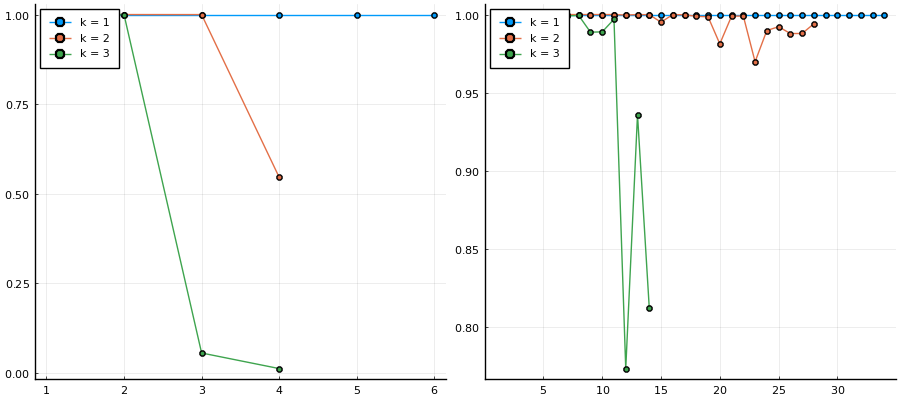

In [19]:
p = plot(; layout=2, size=(900,400))

plot!(p[1]; legend=:topleft)
plot!(p[2]; legend=:topleft)

j = 5
for k ∈ 1:d-1
    ind = 1:min(2*rA[k,j], length(sA[k,j]))
    ρ = sA[k,j][ind]./σA[k][ind]
    plot!(p[1], ρ[ind], label=@sprintf("k = %d", k), marker=:o, markersize=4)
    ind = 1:min(2*rB[k,j], length(sB[k,j]))
    ρ = sB[k,j][ind]./σB[k][ind]
    plot!(p[2], ρ[ind], label=@sprintf("k = %d", k), marker=:o, markersize=4)
end
current()

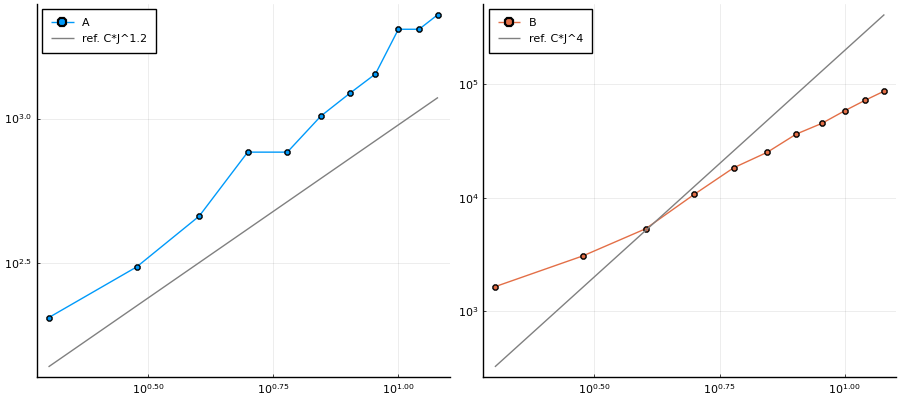

In [20]:
p = plot(; xscale=:log10, yscale=:log10, layout=2, size=(900,400))
plot!(p[1], J, NtA, label="A", color=1, marker=:o, markersize=4, legend=:topleft)
plot!(p[2], J, NtB, label="B", color=2, marker=:o, markersize=4, legend=:topleft)
plot!(p[1], J, 60*J.^1.2, label="ref. C*J^1.2", color=:gray)
plot!(p[2], J, 20*J.^4, label="ref. C*J^4", color=:gray)